In [51]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [52]:
import json
filename = 'apartments.json'

with open(filename, mode="r", encoding="utf-8") as file:
    df_json = json.load(file)
    
df_json

[{'title': 'Mieszkanie Warszawa Bielany, ul. Broniewskiego',
  'price': '579 000',
  'price/m2': '12 062,50 zł/m',
  'town': 'Warszawa',
  'district': 'Bielany',
  'voivodeship': 'mazowieckie',
  'Powierzchnia w m2': '48 m',
  'Liczba pokoi': '3',
  'Piętro': '4',
  'Forma własności': 'własność',
  'Rok budowy': '1973',
  'Typ zabudowy': 'blok',
  'Liczba pięter w budynku': '4',
  'Forma kuchni': 'oddzielna',
  'Numer referencyjny': 'gratka-W/BR_1'},
 {'title': 'Mieszkanie Warszawa Mirów',
  'price': '1 170 000',
  'price/m2': '11 027,33 zł/m',
  'town': 'Warszawa',
  'district': 'Mirów',
  'voivodeship': 'mazowieckie',
  'Powierzchnia w m2': '106,10 m',
  'Liczba pokoi': '3',
  'Piętro': '8',
  'Forma własności': 'własność',
  'Rok budowy': '1990',
  'Typ zabudowy': 'blok',
  'Liczba pięter w budynku': '10',
  'Miejsce parkingowe': 'w garażu',
  'Numer referencyjny': 'gratka-4/7357/OMS'},
 {'title': 'Mieszkanie Warszawa Sielce, ul. Hołówki',
  'price': '1 425 000',
  'price/m2': '14 9

In [53]:
df1 = pd.DataFrame(df_json)
df1.head()

,title,price,price/m2,town,district,voivodeship,Powierzchnia w m2,Liczba pokoi,Piętro,Forma własności,...,Materiał budynku,Dostępność od,Czy mieszkanie ma łazienkę?,Liczba miejsc parkingowych,Stan instalacji,Stan łazienki,Okna,Głośność,Usytuowanie względem stron świata,"Opłaty (czynsz administracyjny, media)"
0,"Mieszkanie Warszawa Bielany, ul. Broniewskiego",579 000,"12 062,50 zł/m",Warszawa,Bielany,mazowieckie,48 m,3,4,własność,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mieszkanie Warszawa Mirów,1 170 000,"11 027,33 zł/m",Warszawa,Mirów,mazowieckie,"106,10 m",3,8,własność,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Mieszkanie Warszawa Sielce, ul. Hołówki",1 425 000,"14 968,49 zł/m",Warszawa,Sielce,mazowieckie,"95,20 m",3,1,własność,...,cegła,2022-03-31,tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Mieszkanie Warszawa Ursynów, ul. Rybitwy",1 900 000,"18 787,70 zł/m",Warszawa,Ursynów,mazowieckie,"101,13 m",3,2,własność,...,NaN,NaN,tak,1,NaN,NaN,NaN,NaN,NaN,NaN
4,"Mieszkanie Warszawa Śródmieście, ul. Sienna",1 676 100,"21 694,28 zł/m",Warszawa,Śródmieście,mazowieckie,"77,26 m",4,5,spółdzielcze własnościowe z KW,...,cegła,NaN,tak,1,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df1.shape

(1750, 27)

In [55]:
df1.dtypes

title                                     object
price                                     object
price/m2                                  object
town                                      object
district                                  object
voivodeship                               object
Powierzchnia w m2                         object
Liczba pokoi                              object
Piętro                                    object
Forma własności                           object
Rok budowy                                object
Typ zabudowy                              object
Liczba pięter w budynku                   object
Forma kuchni                              object
Numer referencyjny                        object
Miejsce parkingowe                        object
Stan                                      object
Materiał budynku                          object
Dostępność od                             object
Czy mieszkanie ma łazienkę?               object
Liczba miejsc parkin

In [56]:
df1['price/m2'] = df1['price/m2'].str.replace(" ", "")
df1['price/m2'] = df1['price/m2'].str.replace("zł/m", "")
df1['price/m2'] = df1['price/m2'].str.replace(',', '.').astype(float)

In [57]:
df1.isnull().sum()

title                                        0
price                                        0
price/m2                                     0
town                                         0
district                                     0
voivodeship                                224
Powierzchnia w m2                            0
Liczba pokoi                                17
Piętro                                      41
Forma własności                            601
Rok budowy                                 360
Typ zabudowy                               316
Liczba pięter w budynku                    115
Forma kuchni                               954
Numer referencyjny                         267
Miejsce parkingowe                        1246
Stan                                      1051
Materiał budynku                           913
Dostępność od                             1390
Czy mieszkanie ma łazienkę?                737
Liczba miejsc parkingowych                1406
Stan instalac

In [58]:
df1.groupby('voivodeship')['voivodeship'].agg('count')

voivodeship
dolnośląskie            67
kujawsko-pomorskie      49
lubelskie               22
mazowieckie            779
małopolskie            218
podkarpackie             4
podlaskie                1
pomorskie               87
warmińsko-mazurskie     21
wielkopolskie          124
zachodniopomorskie      31
łódzkie                 66
śląskie                 55
świętokrzyskie           2
Name: voivodeship, dtype: int64

In [59]:
df1.loc[df1['voivodeship'].isnull(), 'voivodeship'] = 'brak'

# df1 = df1[(df1['voivodeship'] == 'mazowieckie') | (df1['voivodeship'] == 'małopolskie') | (df1['voivodeship'] == 'wielkopolskie')]

df1['voivodeship'] = df1['voivodeship'].astype('category')
df1.groupby('voivodeship')['voivodeship'].agg('count')

voivodeship
brak                   224
dolnośląskie            67
kujawsko-pomorskie      49
lubelskie               22
mazowieckie            779
małopolskie            218
podkarpackie             4
podlaskie                1
pomorskie               87
warmińsko-mazurskie     21
wielkopolskie          124
zachodniopomorskie      31
łódzkie                 66
śląskie                 55
świętokrzyskie           2
Name: voivodeship, dtype: int64

In [60]:
def plot_boxplot(df, attribute):
    data =[]

    for key, subdf in df.groupby(attribute):
        data.append(subdf['price/m2'])
    
    fig = plt.figure(figsize =(15, 10))
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data)
    plt.show()

In [61]:
def remove_outliers(df, attribute):
    n = 5
    
    df_no_outliers = pd.DataFrame(columns=df.columns)
    
    for key, subdf in df.groupby(attribute):
        m = np.mean(subdf['price/m2'])
        st = np.std(subdf['price/m2'])
        
        df_temp = subdf[(subdf['price/m2']>(m - n*st)) & (subdf['price/m2']<(m + n*st))]
        
        df_no_outliers = pd.concat([df_no_outliers, df_temp], ignore_index=True)

    return df_no_outliers

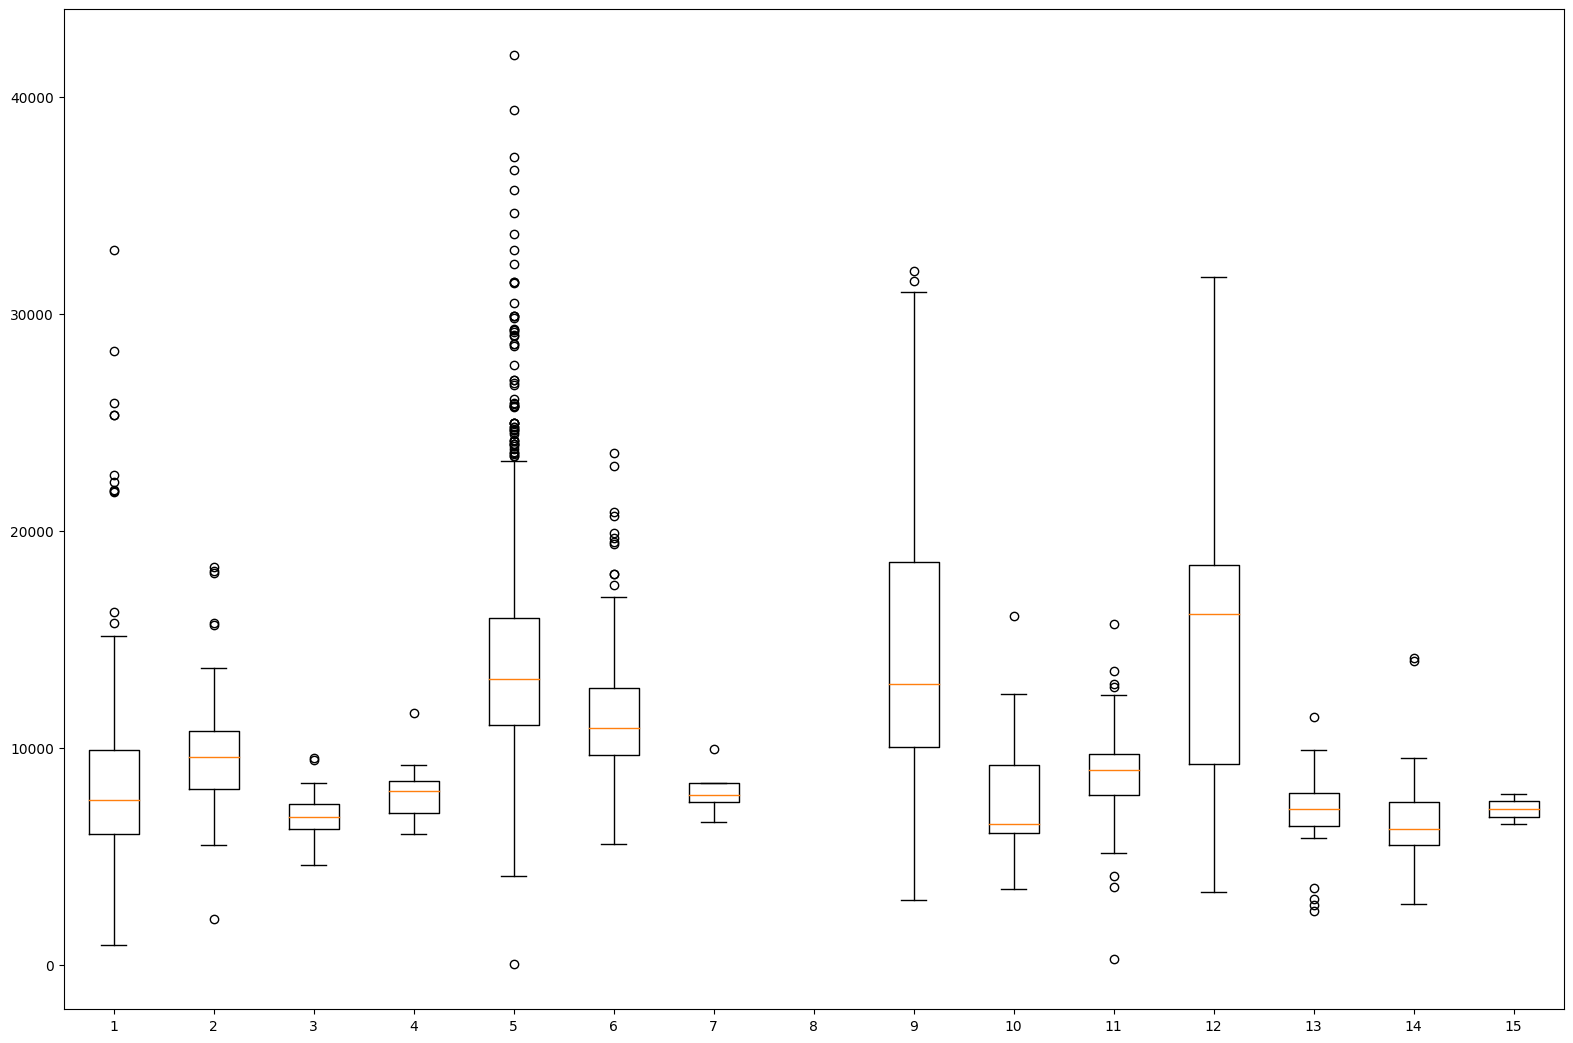

In [62]:
df1 = remove_outliers(df1, 'voivodeship')
plot_boxplot(df1, 'voivodeship')

In [63]:
df1['Powierzchnia w m2'] = df1['Powierzchnia w m2'].str.replace(" ", "")
df1['Powierzchnia w m2'] = df1['Powierzchnia w m2'].str.replace("m", "")
df1['Powierzchnia w m2'] = df1['Powierzchnia w m2'].str.replace(',', '.').astype(float)

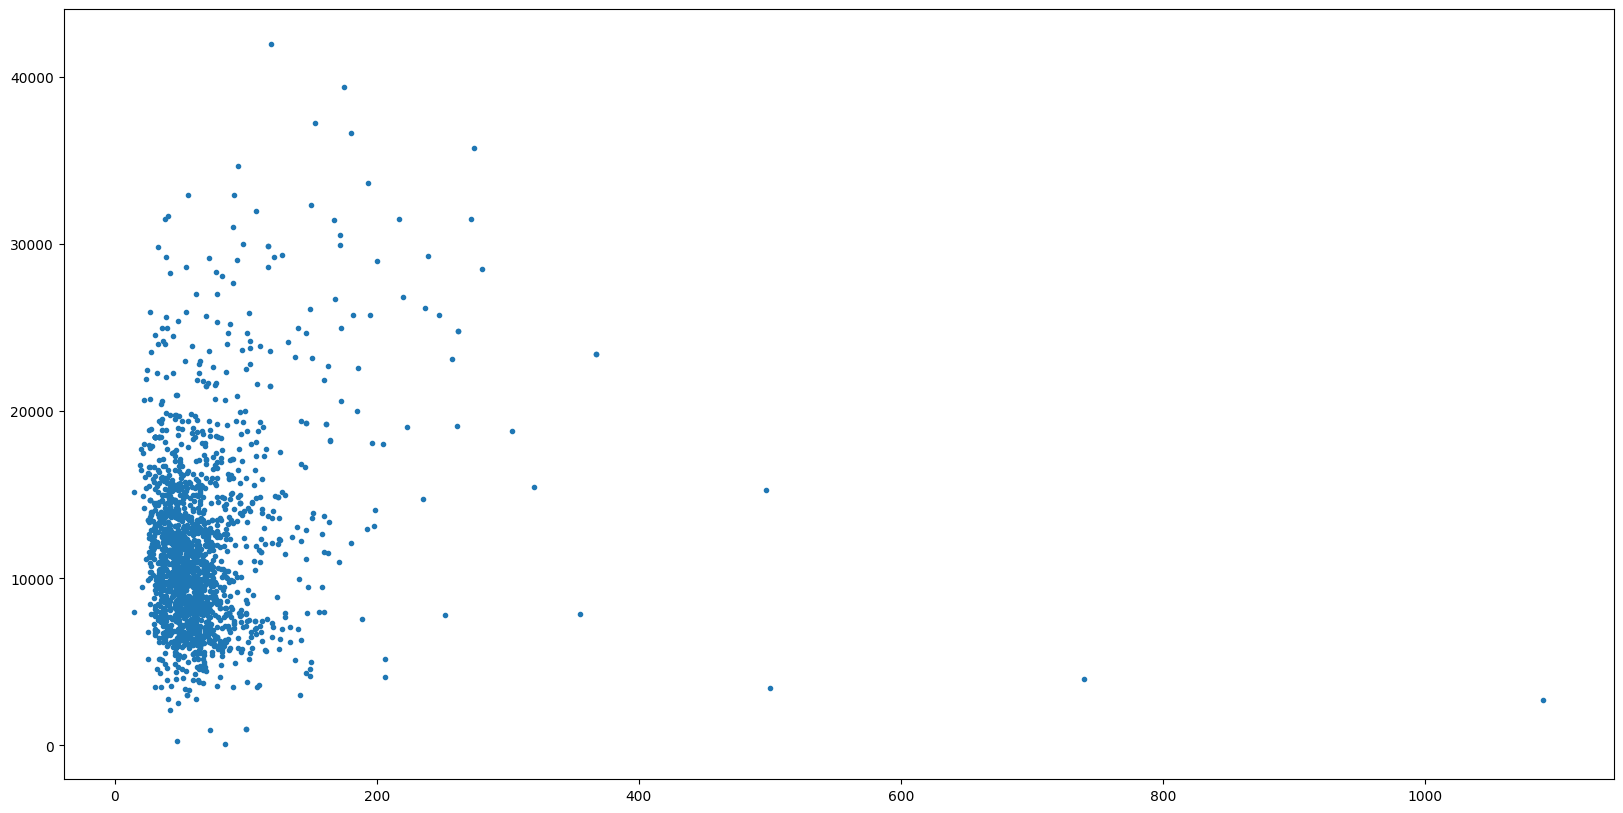

In [64]:
plt.plot(df1['Powierzchnia w m2'], df1['price/m2'], '.')

In [65]:
df1.groupby('Liczba pokoi')['Liczba pokoi'].agg('count')

Liczba pokoi
1               155
2               611
3               664
4               222
5                54
6                11
7                 7
więcej niż 8      4
Name: Liczba pokoi, dtype: int64

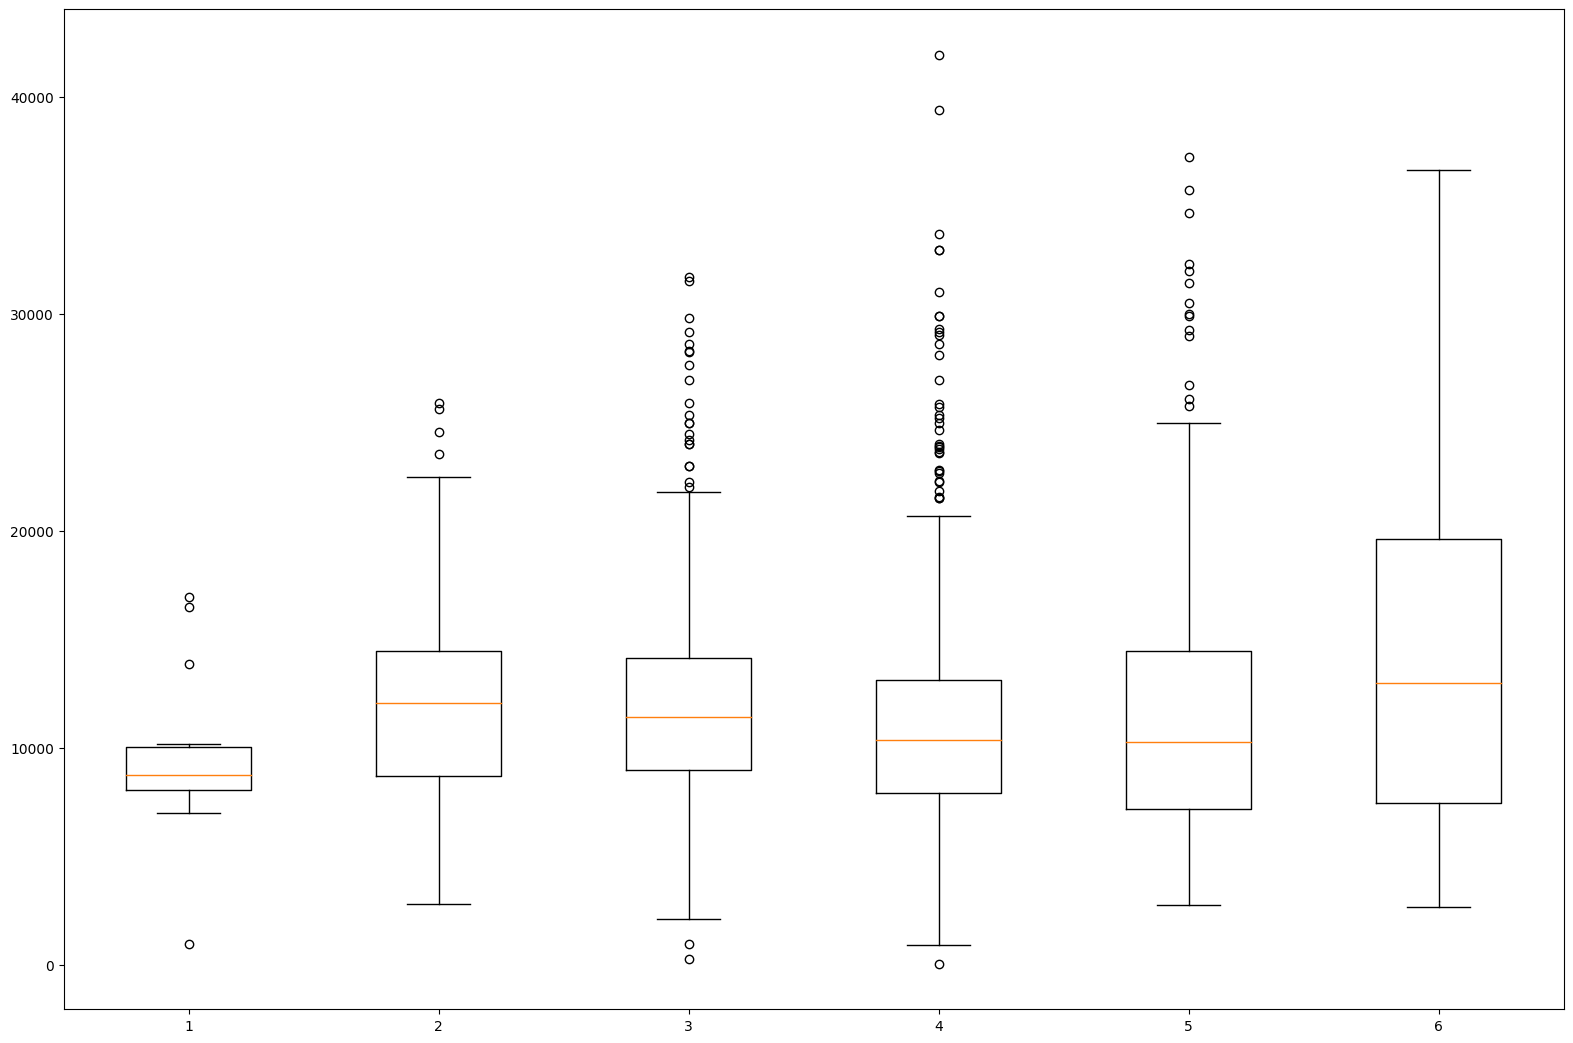

In [66]:
df1.loc[df1['Liczba pokoi'].isnull(), 'Liczba pokoi'] = '0'
df1.loc[(df1['Liczba pokoi'] == '6'), 'Liczba pokoi'] = '5'
df1.loc[(df1['Liczba pokoi'] == '7'), 'Liczba pokoi'] = '5'
df1.loc[(df1['Liczba pokoi'] == 'więcej niż 8'), 'Liczba pokoi'] = '5'

plot_boxplot(df1, 'Liczba pokoi')

df1['Liczba pokoi'] = df1['Liczba pokoi'].astype(int)

In [67]:
df1.groupby('Piętro')['Piętro'].agg('count')

Piętro
1               335
10               32
11               15
12                9
13                6
14                3
15                2
16                1
17                1
18                1
2               303
21                1
22                1
25                2
3               256
4               221
5                79
6                58
7                45
8                42
9                22
niski parter      5
parter          259
poddasze          5
Name: Piętro, dtype: int64

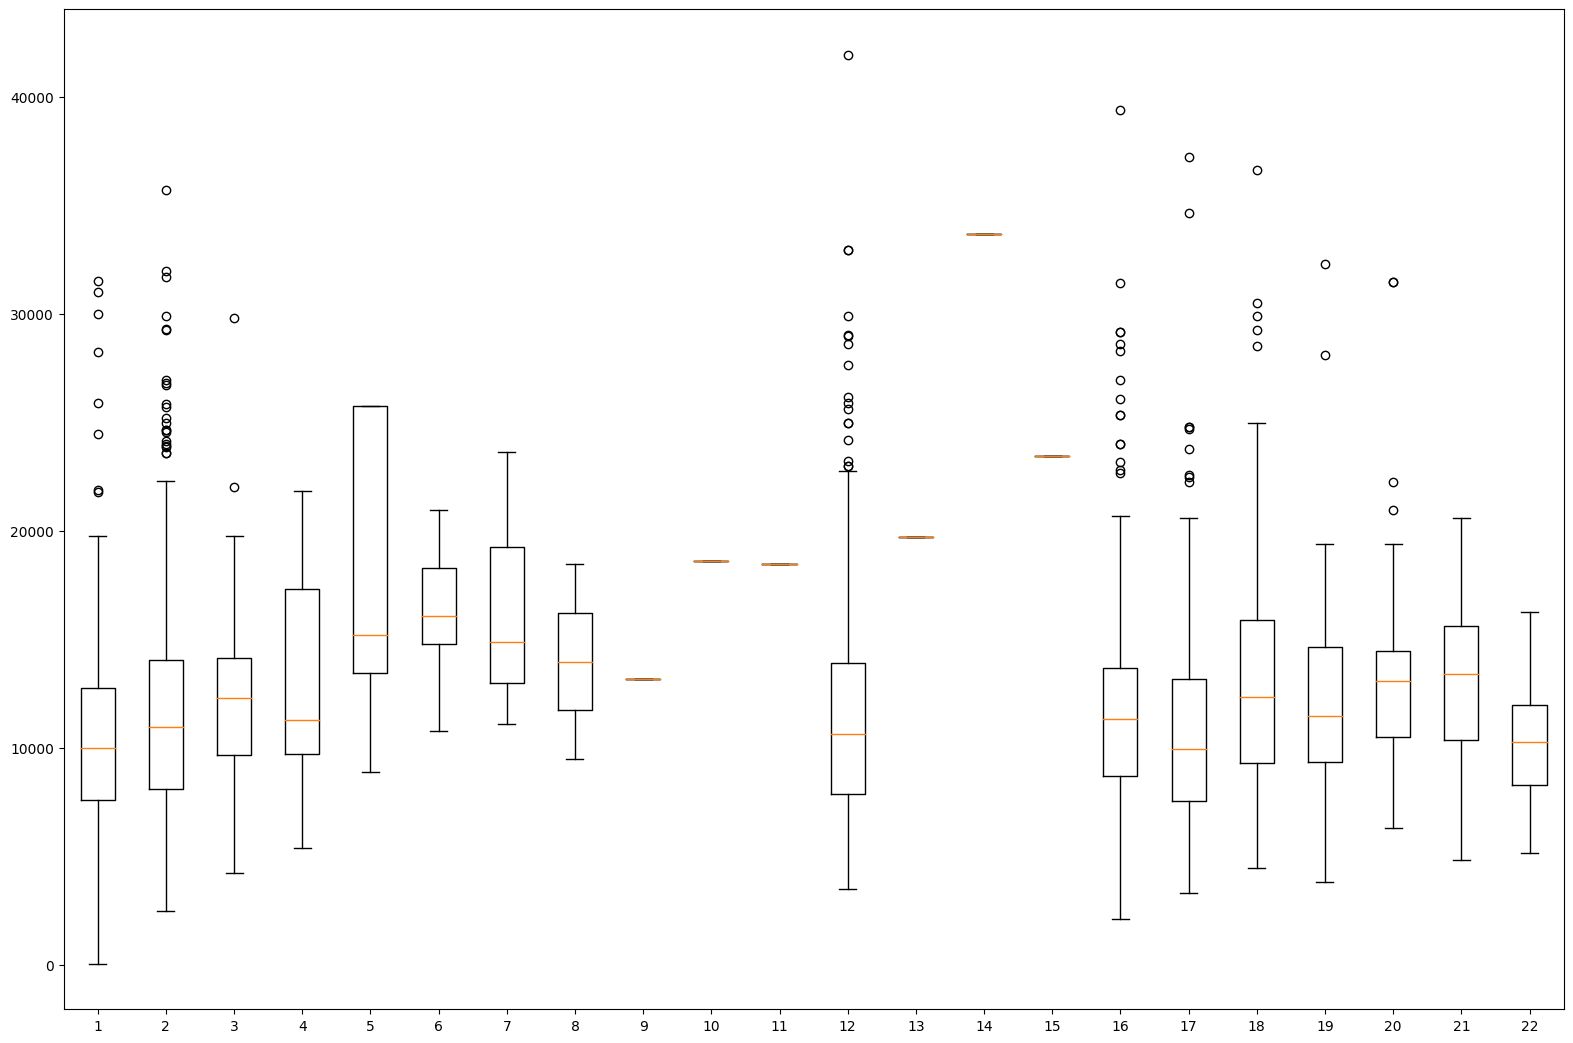

In [68]:
df1.loc[df1['Piętro'].isnull(), 'Piętro'] = '0'
df1.loc[df1['Piętro'] == 'niski parter', 'Piętro'] = '0'
df1.loc[df1['Piętro'] == 'parter', 'Piętro'] = '0'
df1.loc[df1['Piętro'] == 'poddasze', 'Piętro'] = '2'

plot_boxplot(df1, 'Piętro')

df1['Piętro'] = df1['Piętro'].astype(int)

In [69]:
# df1.groupby('Rok budowy')['Rok budowy'].agg('count')

In [70]:
# df1.loc[df1['Rok budowy'].isnull(), 'Rok budowy'] = '2000'

# df1['Rok budowy'] = df1['Rok budowy'].astype(int)

# df1 = df1[df1['Rok budowy'] > 1800]

# plt.plot(df1['Rok budowy'], df1['price/m2'], '.')

In [71]:
df1.groupby('Typ zabudowy')['Typ zabudowy'].agg('count')

Typ zabudowy
apartamentowiec                  364
blok                             840
dom wielorodzinny/szeregowiec     30
kamienica                        195
loft                               2
Name: Typ zabudowy, dtype: int64

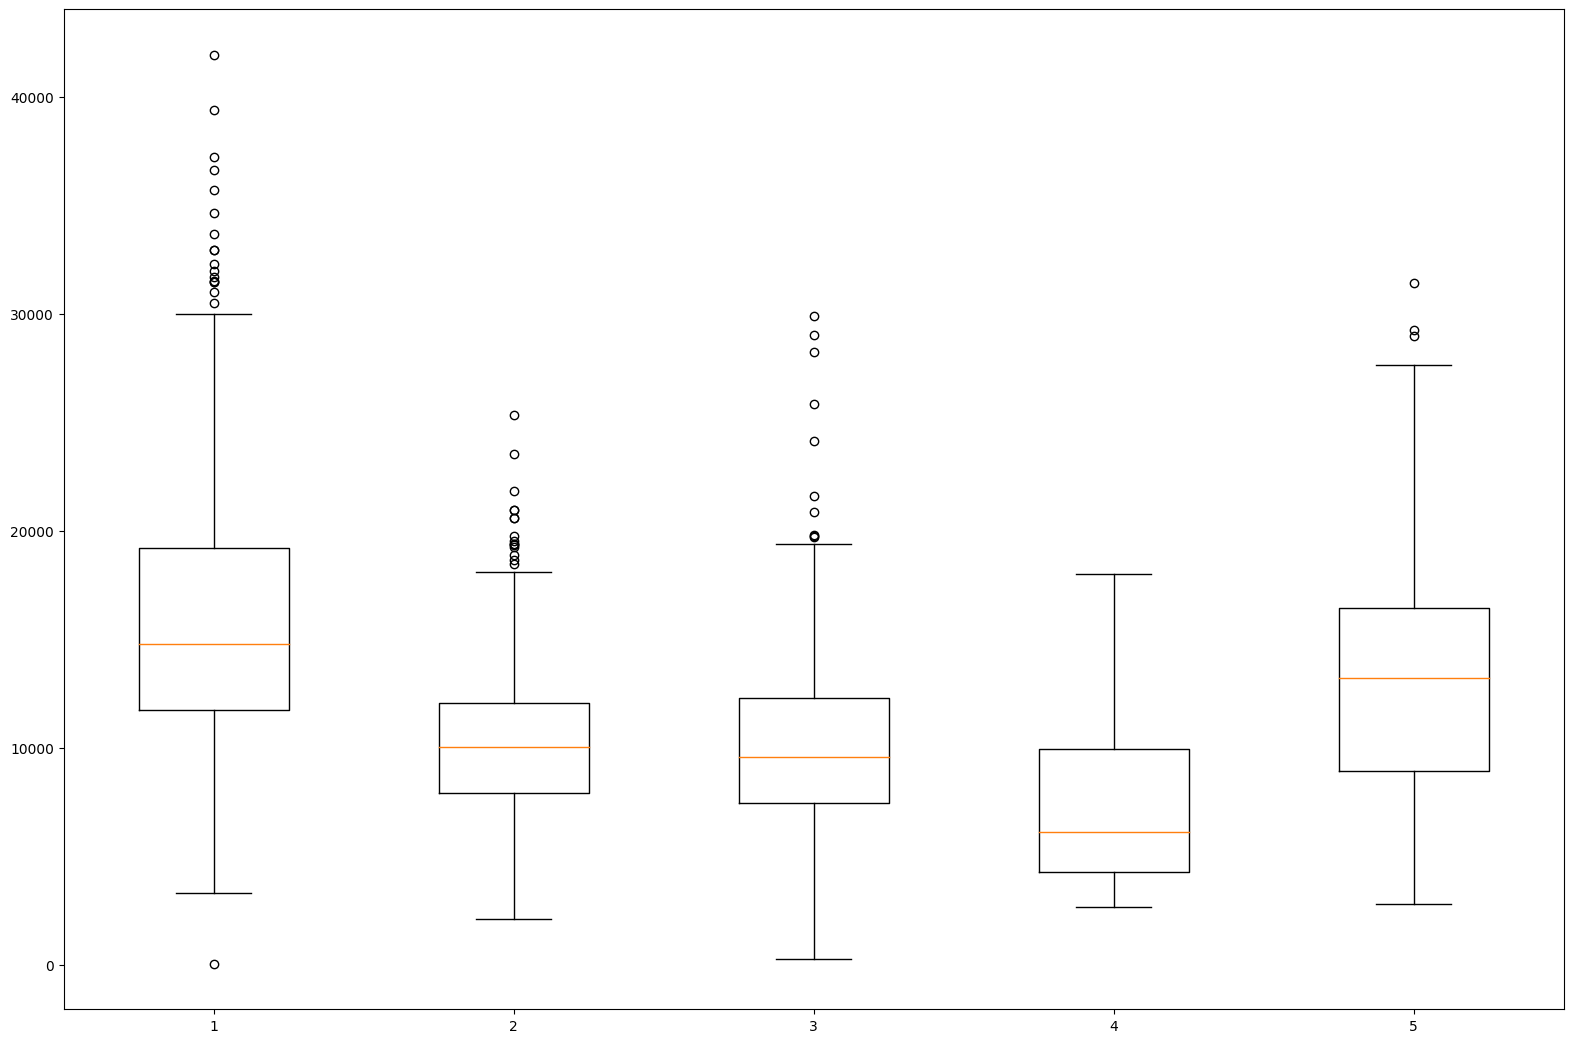

In [72]:
df1.loc[df1['Typ zabudowy'].isnull(), 'Typ zabudowy'] = 'brak'
df1.loc[df1['Typ zabudowy'] == 'loft', 'Typ zabudowy'] = 'brak'

df1 = remove_outliers(df1, 'Typ zabudowy')

df1['Typ zabudowy'] = df1['Typ zabudowy'].astype('category')

plot_boxplot(df1, 'Typ zabudowy')

In [73]:
df1.groupby('Liczba pięter w budynku')['Liczba pięter w budynku'].agg('count')

Liczba pięter w budynku
0 (parter)      2
1              36
10            168
11             40
12             25
13              9
14              4
15             22
16              9
17              5
2             175
20              2
22              5
23              1
24              1
25              3
29              1
3             245
4             455
5             165
6              88
7              62
8              71
9              32
powyżej 30      4
Name: Liczba pięter w budynku, dtype: int64

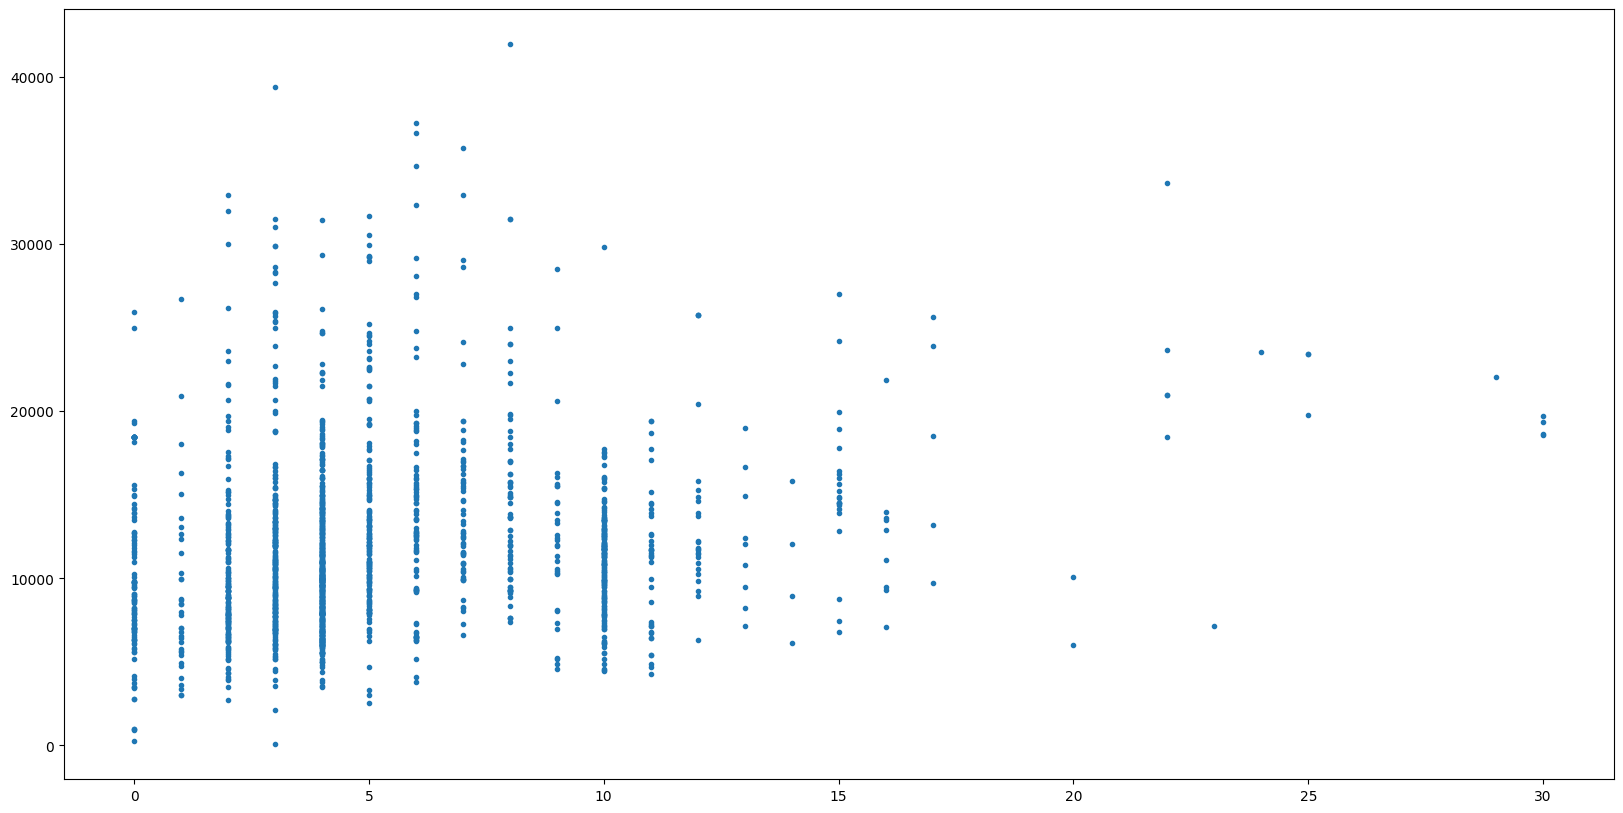

In [74]:
df1.loc[df1['Liczba pięter w budynku'].isnull(), 'Liczba pięter w budynku'] = '0'
df1.loc[df1['Liczba pięter w budynku'] == '0 (parter)', 'Liczba pięter w budynku'] = '0'
df1.loc[df1['Liczba pięter w budynku'] == 'powyżej 30', 'Liczba pięter w budynku'] = '30'

df1['Liczba pięter w budynku'] = df1['Liczba pięter w budynku'].astype('int')

plt.plot(df1['Liczba pięter w budynku'], df1['price/m2'], '.')

In [75]:
df1.groupby('Forma kuchni')['Forma kuchni'].agg('count')

Forma kuchni
oddzielna    370
prześwit      22
w aneksie    403
Name: Forma kuchni, dtype: int64

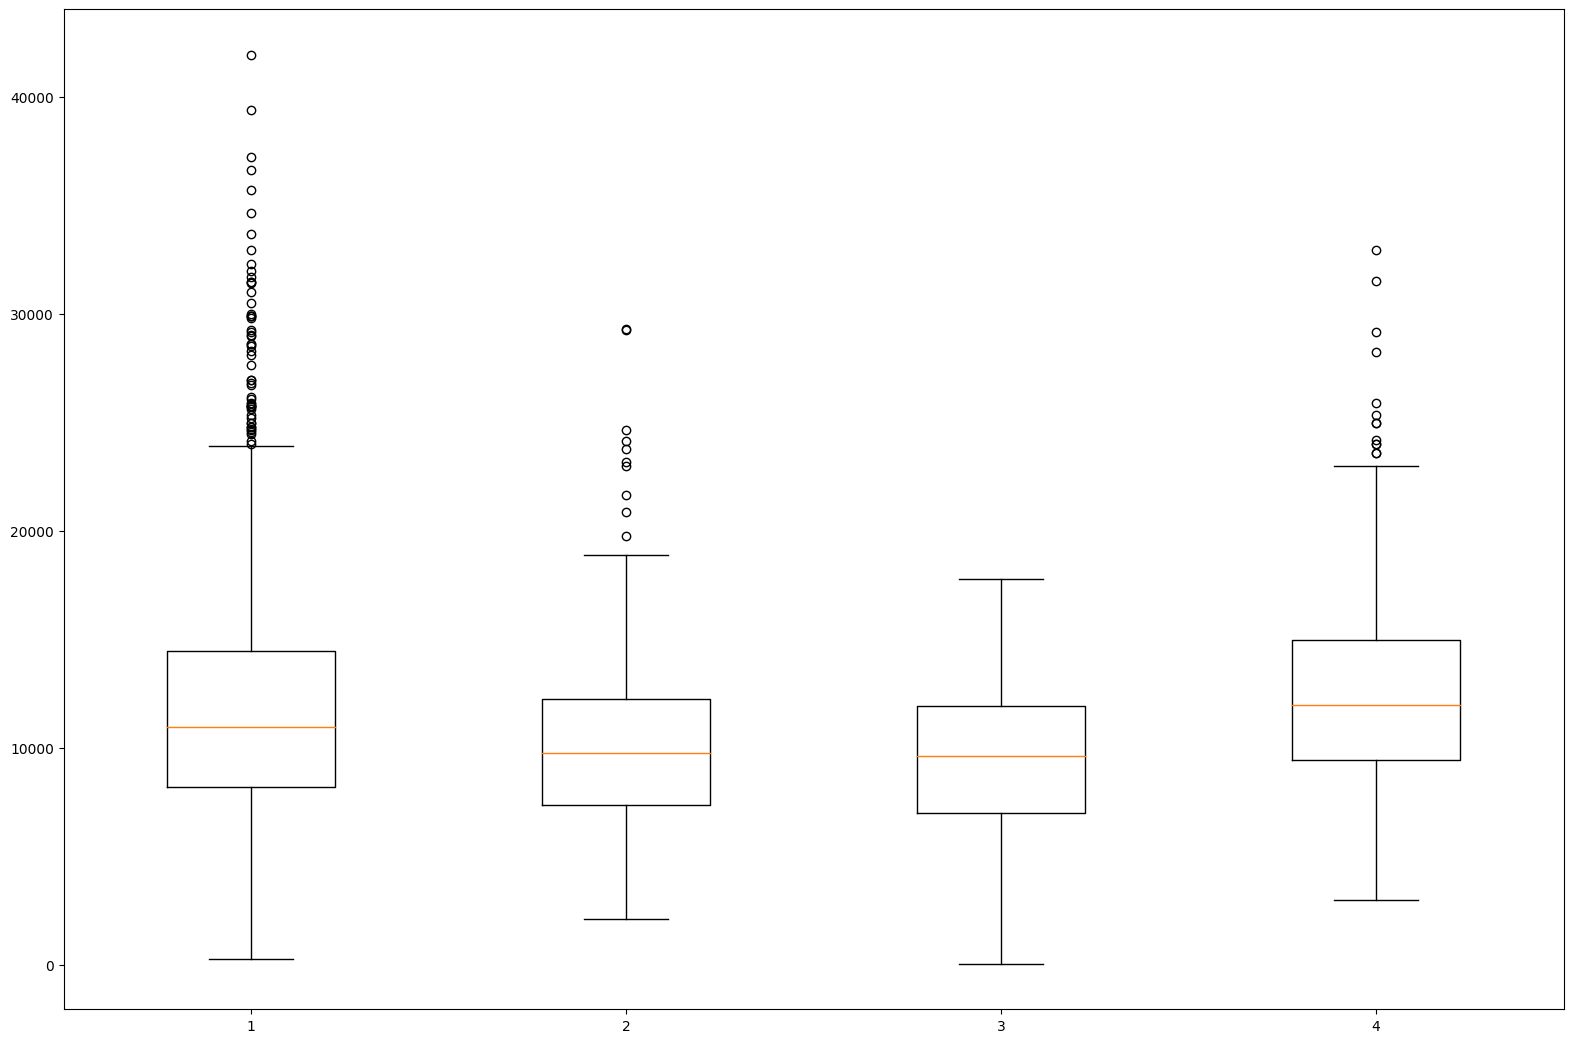

In [76]:
df1.loc[df1['Forma kuchni'].isnull(), 'Forma kuchni'] = 'brak'
df1['Forma kuchni'] = df1['Forma kuchni'].astype('category')

df1 = remove_outliers(df1, 'Forma kuchni')

plot_boxplot(df1, 'Forma kuchni')

In [77]:
df1.groupby('Miejsce parkingowe')['Miejsce parkingowe'].agg('count')

Miejsce parkingowe
brak miejsca parkingowego     63
parking strzeżony              9
przynależne na ulicy         119
w garażu                     312
Name: Miejsce parkingowe, dtype: int64

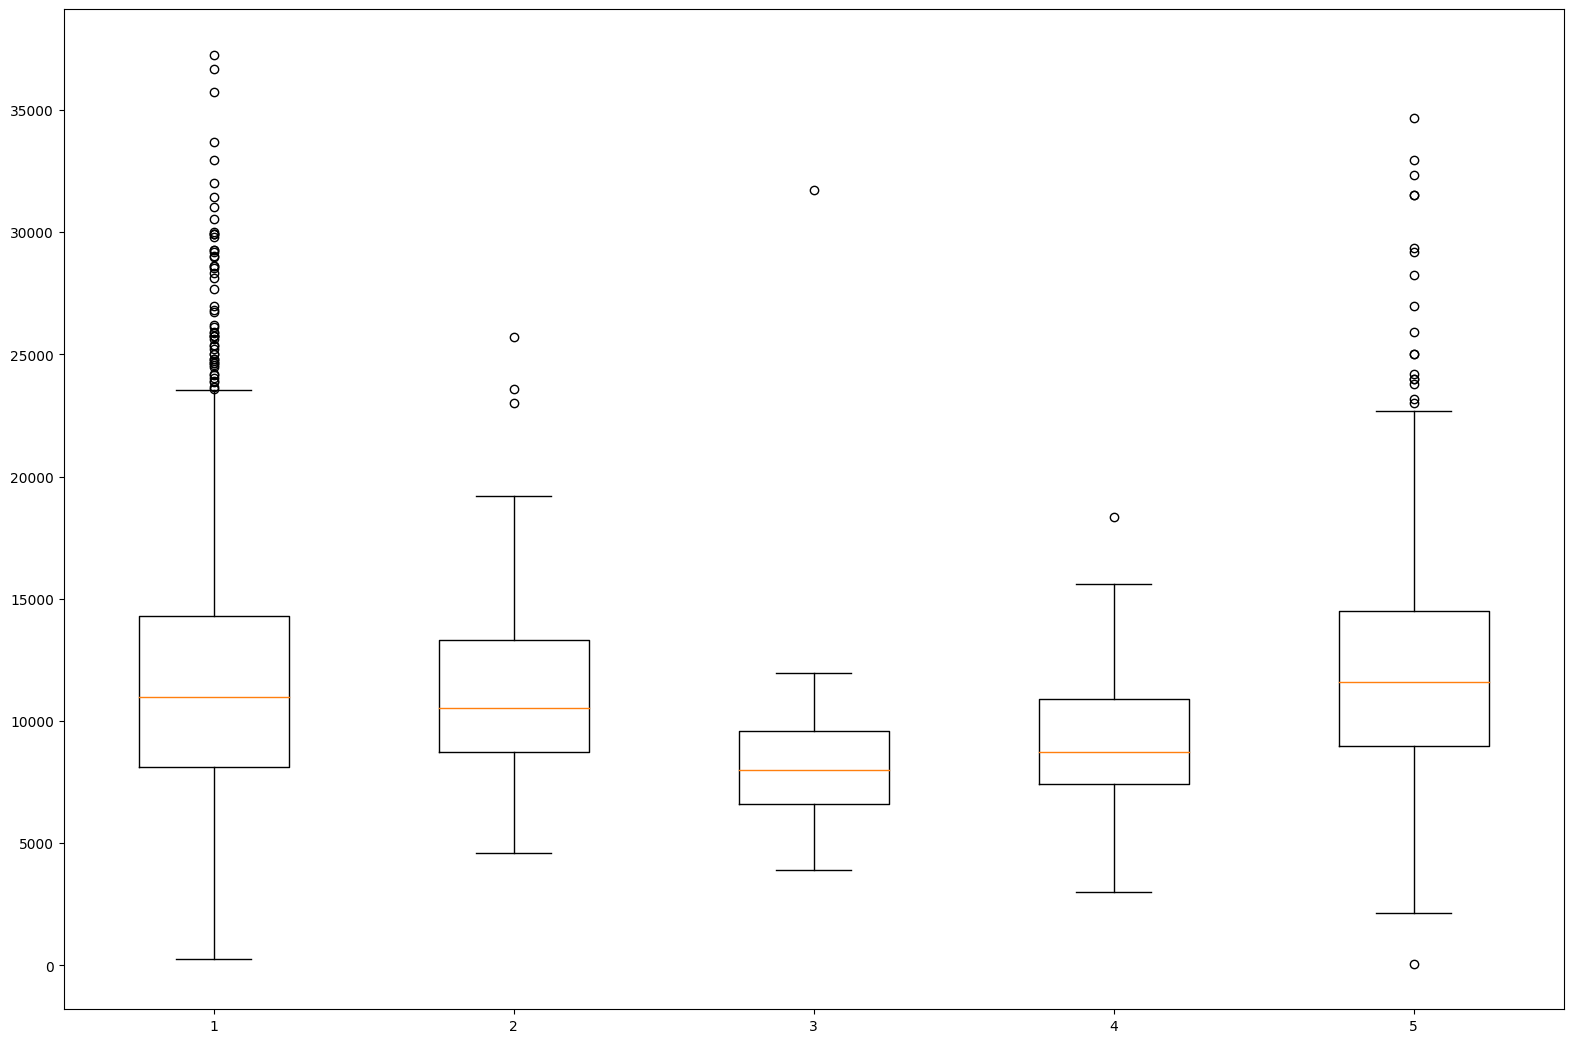

In [78]:
df1.loc[df1['Miejsce parkingowe'].isnull(), 'Miejsce parkingowe'] = 'brak'
df1['Miejsce parkingowe'] = df1['Miejsce parkingowe'].astype('category')

df1 = remove_outliers(df1, 'Miejsce parkingowe')

plot_boxplot(df1, 'Miejsce parkingowe')

In [79]:
df1.groupby('Stan')['Stan'].agg('count')

Stan
do odświeżenia         87
do remontu            119
dobry                 153
stan deweloperski      23
wysoki standard       270
świeżo po remoncie     45
Name: Stan, dtype: int64

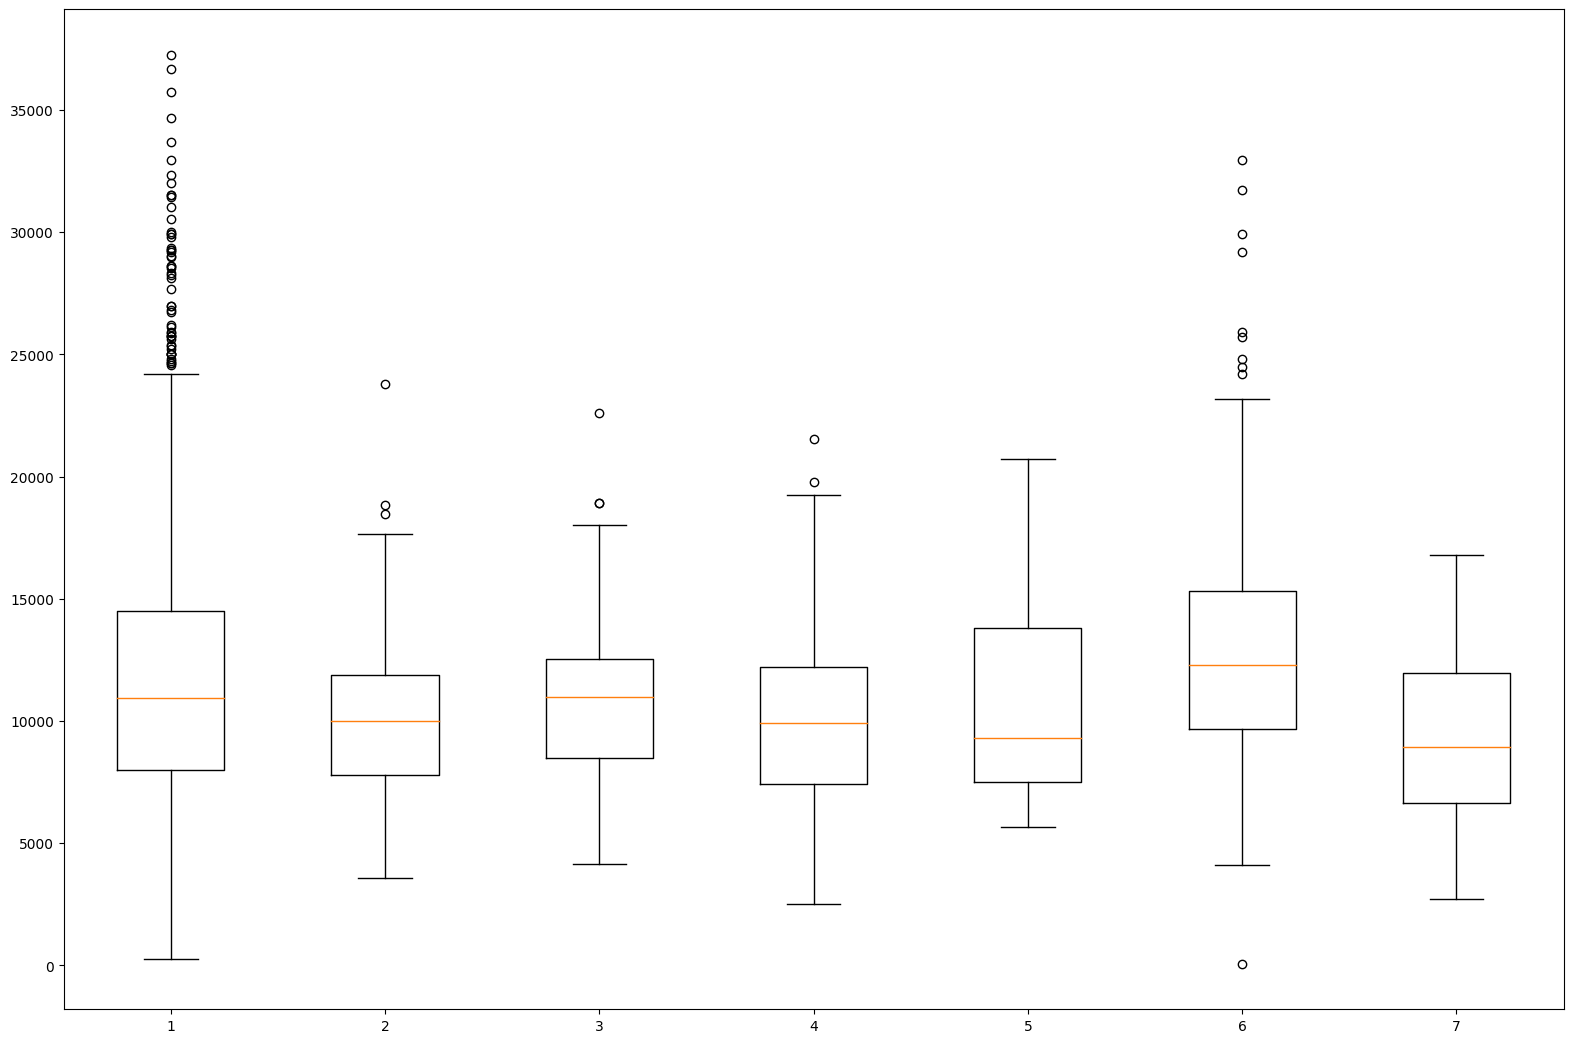

In [80]:
df1.loc[df1['Stan'].isnull(), 'Stan'] = 'brak'
df1['Stan'] = df1['Stan'].astype('category')

df1 = remove_outliers(df1, 'Stan')

plot_boxplot(df1, 'Stan')

In [81]:
df1.groupby('Materiał budynku')['Materiał budynku'].agg('count')

Materiał budynku
beton       44
cegła      486
inne         4
pustak      47
płyta      189
rama H      62
silikat      2
Name: Materiał budynku, dtype: int64

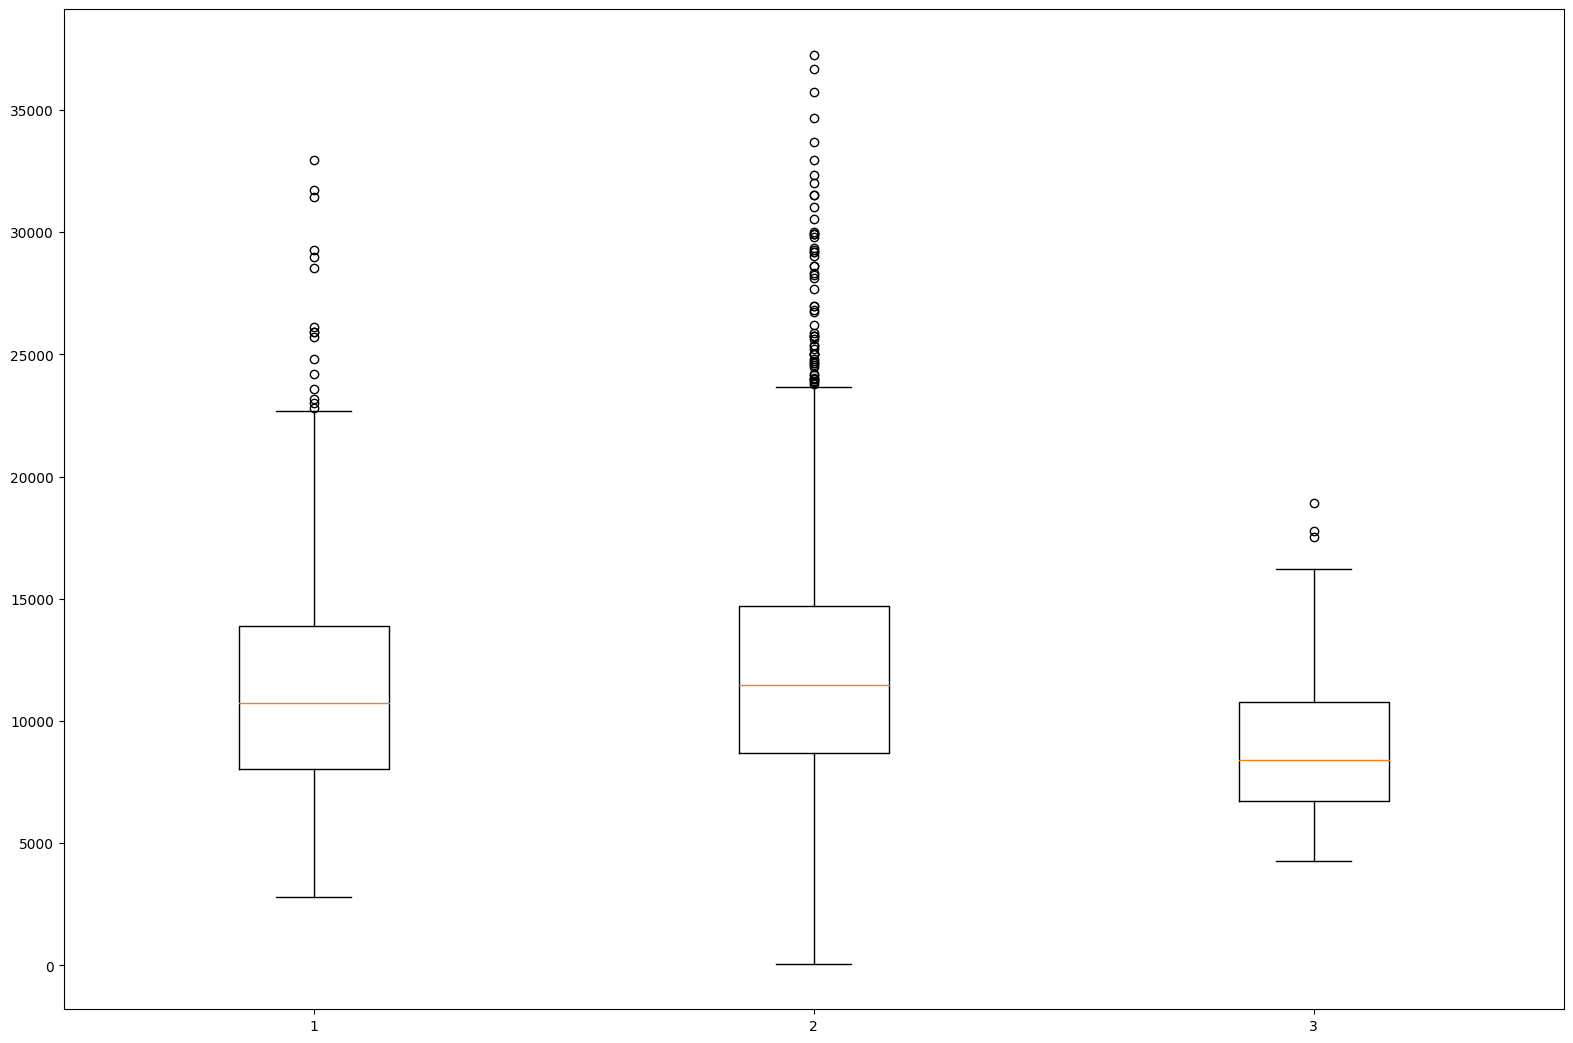

In [82]:
df1.loc[df1['Materiał budynku'].isnull(), 'Materiał budynku'] = 'inne'
df1.loc[df1['Materiał budynku'] == 'beton', 'Materiał budynku'] = 'inne'
df1.loc[df1['Materiał budynku'] == 'pustak', 'Materiał budynku'] = 'inne'
df1.loc[df1['Materiał budynku'] == 'rama H', 'Materiał budynku'] = 'inne'
df1.loc[df1['Materiał budynku'] == 'silikat', 'Materiał budynku'] = 'inne'

df1['Materiał budynku'] = df1['Materiał budynku'].astype('category')

df1 = remove_outliers(df1, 'Materiał budynku')

plot_boxplot(df1, 'Materiał budynku')

In [83]:
df1.groupby('Czy mieszkanie ma łazienkę?')['Czy mieszkanie ma łazienkę?'].agg('count')

Czy mieszkanie ma łazienkę?
tak    1011
Name: Czy mieszkanie ma łazienkę?, dtype: int64

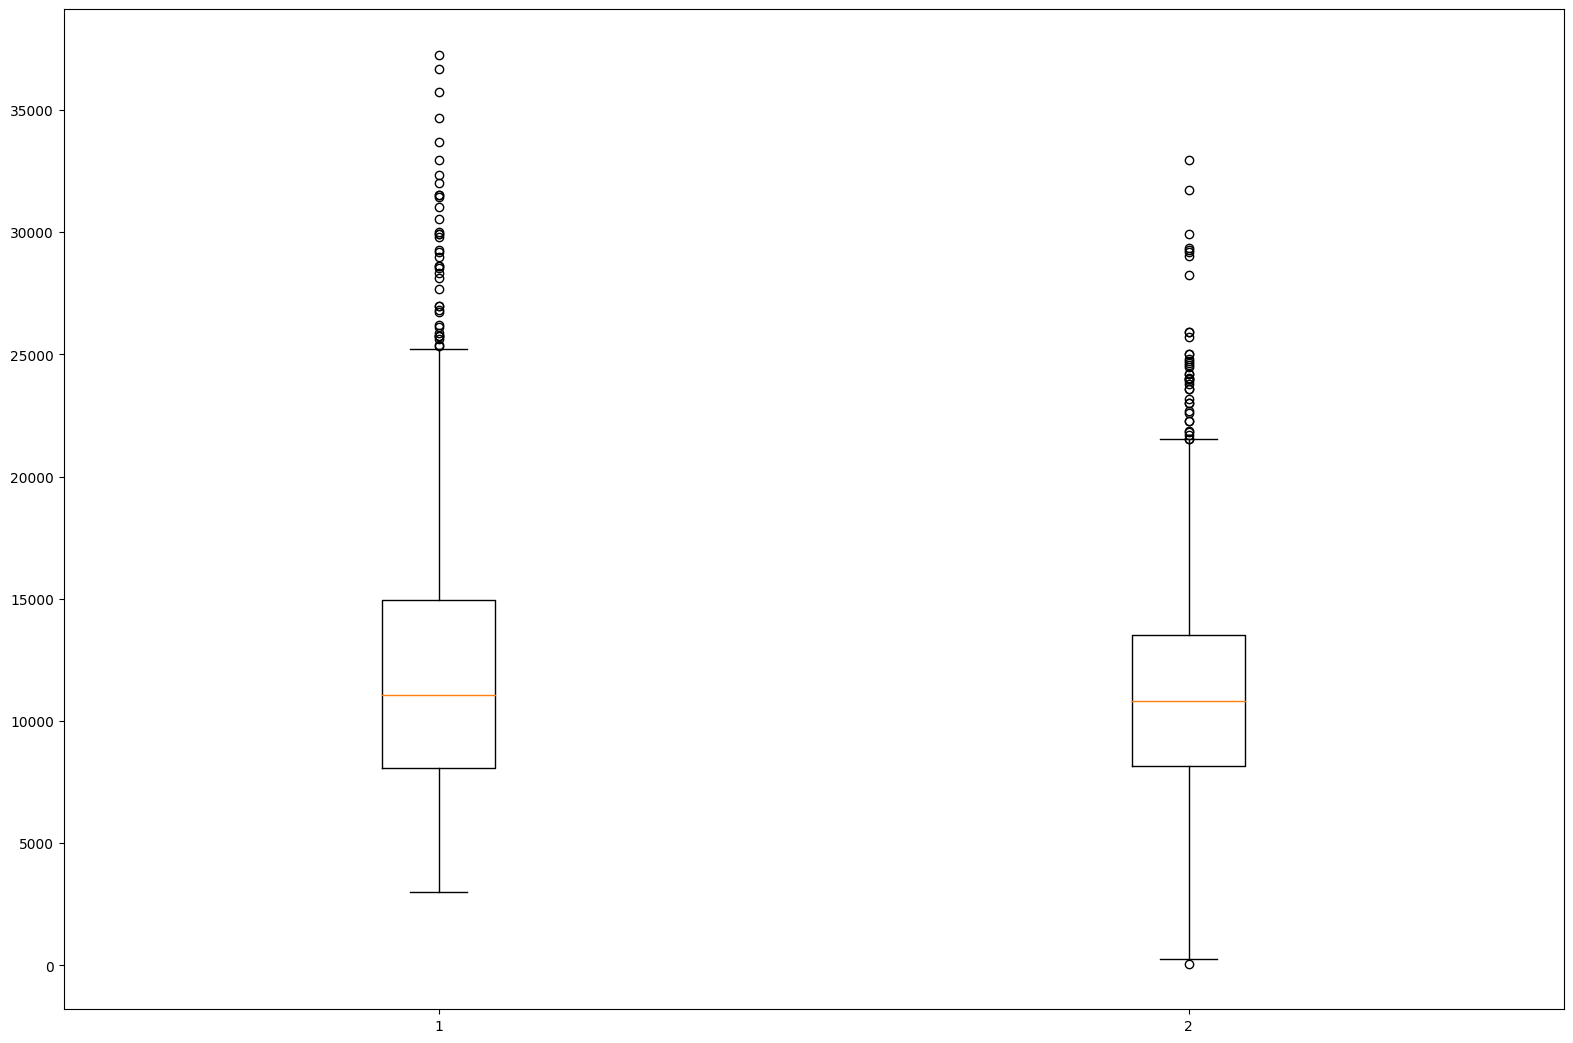

In [84]:
df1.loc[df1['Czy mieszkanie ma łazienkę?'].isnull(), 'Czy mieszkanie ma łazienkę?'] = 'inne'
df1['Czy mieszkanie ma łazienkę?'] = df1['Czy mieszkanie ma łazienkę?'].astype('category')

df1 = remove_outliers(df1, 'Czy mieszkanie ma łazienkę?')

plot_boxplot(df1, 'Czy mieszkanie ma łazienkę?')

In [85]:
# df2 = df1.drop(['town', 'district', 'Forma własności', 'Numer referencyjny', 'Dostępność od', 'Liczba miejsc parkingowych',
#                 'Stan instalacji', 'Stan łazienki', 'Okna', 'Głośność', 'Usytuowanie względem stron świata', 
#                 'Opłaty (czynsz administracyjny, media)', 'title', 'price'], axis='columns')

df2 = df1.drop(['Rok budowy', 'town', 'district', 'Forma własności', 'Numer referencyjny', 'Dostępność od', 
                'Liczba miejsc parkingowych', 'Stan instalacji', 'Stan łazienki', 'Okna', 'Głośność', 
                'Usytuowanie względem stron świata', 'Opłaty (czynsz administracyjny, media)', 'title', 'price'], 
                axis='columns')

In [86]:
df2.dtypes

price/m2                        float64
voivodeship                    category
Powierzchnia w m2               float64
Liczba pokoi                     object
Piętro                           object
Typ zabudowy                   category
Liczba pięter w budynku          object
Forma kuchni                   category
Miejsce parkingowe             category
Stan                           category
Materiał budynku               category
Czy mieszkanie ma łazienkę?    category
dtype: object

In [87]:
y = df2['price/m2']
df3 = df2.drop(['price/m2'], axis='columns')

In [88]:
dummies_voivodeship = pd.get_dummies(df3['voivodeship'], prefix='voivodeship')
dummies_voivodeship = dummies_voivodeship.drop(['voivodeship_brak'], axis='columns')
dummies_voivodeship

,voivodeship_dolnośląskie,voivodeship_kujawsko-pomorskie,voivodeship_lubelskie,voivodeship_mazowieckie,voivodeship_małopolskie,voivodeship_podkarpackie,voivodeship_podlaskie,voivodeship_pomorskie,voivodeship_warmińsko-mazurskie,voivodeship_wielkopolskie,voivodeship_zachodniopomorskie,voivodeship_łódzkie,voivodeship_śląskie,voivodeship_świętokrzyskie
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1738,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1740,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
dummies_zabudowa = pd.get_dummies(df3['Typ zabudowy'], prefix='Zabudowa')
dummies_zabudowa = dummies_zabudowa.drop(['Zabudowa_brak'], axis='columns')
dummies_zabudowa

,Zabudowa_apartamentowiec,Zabudowa_blok,Zabudowa_dom wielorodzinny/szeregowiec,Zabudowa_kamienica
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1737,0,1,0,0
1738,0,1,0,0
1739,0,0,0,0
1740,0,1,0,0


In [90]:
dummies_kuchnia = pd.get_dummies(df3['Forma kuchni'], prefix='Kuchnia')
dummies_kuchnia = dummies_kuchnia.drop(['Kuchnia_brak'], axis='columns')
dummies_kuchnia

,Kuchnia_oddzielna,Kuchnia_prześwit,Kuchnia_w aneksie
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1737,1,0,0
1738,0,0,0
1739,1,0,0
1740,0,0,1


In [91]:
dummies_parking = pd.get_dummies(df3['Miejsce parkingowe'], prefix='Parking')
dummies_parking = dummies_parking.drop(['Parking_brak'], axis='columns')
dummies_parking

,Parking_brak miejsca parkingowego,Parking_parking strzeżony,Parking_przynależne na ulicy,Parking_w garażu
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1737,0,0,0,0
1738,1,0,0,0
1739,0,0,1,0
1740,0,0,1,0


In [92]:
dummies_stan = pd.get_dummies(df3['Stan'], prefix='Stan')
dummies_stan = dummies_stan.drop(['Stan_brak'], axis='columns')
dummies_stan

,Stan_do odświeżenia,Stan_do remontu,Stan_dobry,Stan_stan deweloperski,Stan_wysoki standard,Stan_świeżo po remoncie
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
1737,0,0,0,0,0,1
1738,0,0,0,0,0,1
1739,0,0,0,0,0,1
1740,0,0,0,0,0,1


In [93]:
dummies_material = pd.get_dummies(df3['Materiał budynku'], prefix='Material')
dummies_material = dummies_material.drop(['Material_inne'], axis='columns')
dummies_material

,Material_cegła,Material_płyta
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1737,0,1
1738,0,1
1739,0,1
1740,0,1


In [94]:
dummies_bathroom = pd.get_dummies(df3['Czy mieszkanie ma łazienkę?'], prefix='Bathroom')
dummies_bathroom = dummies_bathroom.drop(['Bathroom_inne'], axis='columns')
dummies_bathroom

,Bathroom_tak
0,0
1,0
2,0
3,0
4,0
...,...
1737,1
1738,1
1739,1
1740,1


In [95]:
df4 = pd.concat([df3, dummies_voivodeship,  dummies_zabudowa, dummies_kuchnia, dummies_parking, dummies_stan, 
                 dummies_material, dummies_bathroom], axis='columns')

df5 = df4.drop(['voivodeship', 'Typ zabudowy', 'Forma kuchni', 'Miejsce parkingowe', 'Stan', 'Materiał budynku', 
                'Czy mieszkanie ma łazienkę?'], axis='columns')

df5

,Powierzchnia w m2,Liczba pokoi,Piętro,Liczba pięter w budynku,voivodeship_dolnośląskie,voivodeship_kujawsko-pomorskie,voivodeship_lubelskie,voivodeship_mazowieckie,voivodeship_małopolskie,voivodeship_podkarpackie,...,Parking_w garażu,Stan_do odświeżenia,Stan_do remontu,Stan_dobry,Stan_stan deweloperski,Stan_wysoki standard,Stan_świeżo po remoncie,Material_cegła,Material_płyta,Bathroom_tak
0,53.70,2,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,53.00,3,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,51.00,2,3,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,62.47,3,1,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,280.00,5,5,9,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,43.00,2,2,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1738,44.52,3,4,4,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
1739,76.60,4,4,4,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
1740,71.34,4,4,4,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [96]:
X = df5.copy()

print(X.shape)
print(y.shape)
X['Liczba pokoi'] = X['Liczba pokoi'].astype(int)
X['Piętro'] = X['Piętro'].astype(int)
X['Liczba pięter w budynku'] = X['Liczba pięter w budynku'].astype(int)

X.dtypes

(1742, 38)
(1742,)


Powierzchnia w m2                         float64
Liczba pokoi                                int32
Piętro                                      int32
Liczba pięter w budynku                     int32
voivodeship_dolnośląskie                    uint8
voivodeship_kujawsko-pomorskie              uint8
voivodeship_lubelskie                       uint8
voivodeship_mazowieckie                     uint8
voivodeship_małopolskie                     uint8
voivodeship_podkarpackie                    uint8
voivodeship_podlaskie                       uint8
voivodeship_pomorskie                       uint8
voivodeship_warmińsko-mazurskie             uint8
voivodeship_wielkopolskie                   uint8
voivodeship_zachodniopomorskie              uint8
voivodeship_łódzkie                         uint8
voivodeship_śląskie                         uint8
voivodeship_świętokrzyskie                  uint8
Zabudowa_apartamentowiec                    uint8
Zabudowa_blok                               uint8


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.4591101760967643

In [99]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.45911018, 0.48981498, 0.4620026 , 0.51298618, 0.47329075])

In [100]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
        
find_best_model_using_gridsearchcv(X, y)

c:\ProgramData\Anaconda3\envs\sklearn_matplotlib_numpy_pandas\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\envs\sklearn_matplotlib_numpy_pandas\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\envs\sklearn_matplotlib_numpy_pandas\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\ProgramData\Anaconda3\envs\sklearn_matplotlib_numpy_pandas\lib\site-package

,model,best_score,best_params
0,linear_regression,0.479441,{'positive': False}
1,lasso,0.479948,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.180809,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [101]:
X.columns

Index(['Powierzchnia w m2', 'Liczba pokoi', 'Piętro',
       'Liczba pięter w budynku', 'voivodeship_dolnośląskie',
       'voivodeship_kujawsko-pomorskie', 'voivodeship_lubelskie',
       'voivodeship_mazowieckie', 'voivodeship_małopolskie',
       'voivodeship_podkarpackie', 'voivodeship_podlaskie',
       'voivodeship_pomorskie', 'voivodeship_warmińsko-mazurskie',
       'voivodeship_wielkopolskie', 'voivodeship_zachodniopomorskie',
       'voivodeship_łódzkie', 'voivodeship_śląskie',
       'voivodeship_świętokrzyskie', 'Zabudowa_apartamentowiec',
       'Zabudowa_blok', 'Zabudowa_dom wielorodzinny/szeregowiec',
       'Zabudowa_kamienica', 'Kuchnia_oddzielna', 'Kuchnia_prześwit',
       'Kuchnia_w aneksie', 'Parking_brak miejsca parkingowego',
       'Parking_parking strzeżony', 'Parking_przynależne na ulicy',
       'Parking_w garażu', 'Stan_do odświeżenia', 'Stan_do remontu',
       'Stan_dobry', 'Stan_stan deweloperski', 'Stan_wysoki standard',
       'Stan_świeżo po remoncie',

In [102]:
def predict_price(voivodeship, area, rooms_nr, floor, building_type, building_floors,
                  kitchen, parking, condition, material, bathroom):
    
    voivodeship_index = np.where(X.columns=='voivodeship_' + voivodeship)[0][0]
    zabudowa_index = np.where(X.columns=='Zabudowa_' + building_type)[0][0]
    kuchnia_index = np.where(X.columns=='Kuchnia_' + kitchen)[0][0]
    parking_index = np.where(X.columns=='Parking_' + parking)[0][0]
    stan_index = np.where(X.columns=='Stan_' + condition)[0][0]
    material_index = np.where(X.columns=='Material_' + material)[0][0]
    bathroom_index = np.where(X.columns=='Bathroom_' + bathroom)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = rooms_nr
    x[2] = floor
    x[3] = building_floors

    if voivodeship_index >= 0:
        x[voivodeship_index] = 1
    if zabudowa_index >= 0:
        x[zabudowa_index] = 1
    if kuchnia_index >= 0:
        x[kuchnia_index] = 1
    if parking_index >= 0:
        x[parking_index] = 1
    if stan_index >= 0:
        x[stan_index] = 1
    if material_index >= 0:
        x[material_index] = 1
    if bathroom_index >= 0:
        x[bathroom_index] = 1
        
    return lr_clf.predict([x])[0] * area 

In [103]:
predict_price('mazowieckie', 80, 3, 2, 'blok', 4, 'w aneksie', 'przynależne na ulicy', 'stan deweloperski',
              'cegła', 'tak')

c:\ProgramData\Anaconda3\envs\sklearn_matplotlib_numpy_pandas\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1018791.6341368491

In [104]:
import pickle
with open('apartments_price_predictor_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [105]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w', encoding="utf-8") as f:
    f.write(json.dumps(columns))